<img src="qiskit-heading.gif" width="500 px" align="center">

## _*Qiskit Aqua: Using Grover Search for 3SAT problems*_

This notebook is based on an official notebook by Qiskit team, available at https://github.com/qiskit/qiskit-tutorial under the [Apache License 2.0](https://github.com/Qiskit/qiskit-tutorial/blob/master/LICENSE) license. 

This notebook demonstrates how to use the `Qiskit Aqua` library Grover algorithm and process the result.

Your **TASK** is to execute every step of this notebook while learning to use qiskit-aqua and also strengthening your knowledge of the Grover search algorithm.

In [1]:
import pylab
from qiskit_aqua import run_algorithm
from qiskit_aqua.input import get_input_instance
from qiskit.tools.visualization import matplotlib_circuit_drawer as draw
from qiskit.tools.visualization import plot_histogram

We have a SAT problem to which we want to find solutions using Grover and SAT oracle combination. The SAT problem is specified in the  [DIMACS CNF format](https://www.satcompetition.org/2009/format-benchmarks2009.html). We read one of
the sample cnf files to load the problem.

Try the code below for both sample files `3sat3-5.cnf` and `3sat2-3.cnf`.

In [2]:
with open('3sat3-5.cnf', 'r') as f:
    sat_cnf = f.read()
print(sat_cnf)

c This is an example DIMACS 3-sat file with 3 satisfying solutions: 1 -2 3 0, -1 -2 -3 0, 1 2 -3 0
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0



In order to run an algorithm we need to create a configuration dictionary with the parameters for the algorithm and any other dependent objects it requires. So we first define a dictionary for the algorithm. We name GROVER as the algorithm and as it has no further parameters we are done. GROVER needs an oracle so we configure one. Here we use the SAT oracle which will allow us to solve an optimization SAT problem by searching solution space. We configure the oracle with the problem we loaded above. We then combine the dictionaries into the final single params dictionary that is passed to run_algorithm.

In [3]:
algorithm_cfg = {
    'name': 'Grover'
}

oracle_cfg = {
    'name': 'SAT',
    'cnf': sat_cnf
}

params = {
    'problem': {'name': 'search', 'random_seed': 50},
    'algorithm': algorithm_cfg,
    'oracle': oracle_cfg,
    'backend': {'name': 'qasm_simulator'}
}

result = run_algorithm(params)
print(result['result'])

[1, -2, 3]


As seen above, a satisfying solution to the specified sample SAT problem is obtained, with the absolute values indicating the variable indices, and the signs the `True/False` assignments, similar to the DIMACS format.

A measurements result is also returned where it can be seen, below in the plot, that result\['result'\] was the highest probability. But the other solutions were very close in probability too.

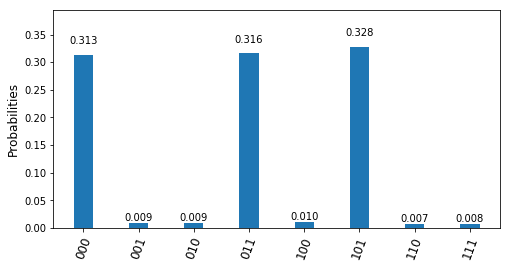

In [4]:
pylab.rcParams['figure.figsize'] = (8, 4)
plot_histogram(result['measurements'])

Try the following command `draw(result['circuit'])` 

Which should produce a figure like:

![grover](grover_output.png)

If it does not and an error is showw instead it is due to a bug in the drawing mechanism the `cnx` gates may not be visible yet, this issue will surely be fixed in later versions.

In [5]:
#draw(result['circuit'])

The above figure shows the circuit that was run for Grover. This circuit was returned from the algorithm for the above visualization which was generated using qiskit.tools.visualization functionality.